<a href="https://colab.research.google.com/github/kotamedan1/202155202089-Permata/blob/master/tugas3_permata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'asl-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F177084%2F399170%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240503%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240503T035050Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D38f54e10cd46ac609221c37209c848e469eb13643ae7634f2c6fa7ed10062664e3f20c9a91386c0fb8df857ee2cc4e9ac59c910a7d3779d479fc2b13821d4ea38476ec19d9392a5e007e721a2d48fe101918bc4054926fc01437666e694aaf157d6450c515bf5f392c840c1a08bc359bad07973177bbfb20961310d8ab4eacdeb2d26bc3e70faa12d75056e3612b2dc6dbd1dd528b4fcd90bf4d5093b2f65ede45777dd25844e46b12bc3ed0ba0db3ea2aa0dbd7bd9afcca71b226f83e68858070f90d344afd0b5546797fd8e3bfda90eaa8afb3c391226387bd5b4a88afd8534460745bd89999e290ad5fc17d5e259edd64816c224d767867f283a3799aa686'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 59642568 bytes downloaded
Downloaded and uncompressed: asl-dataset
Data source import complete.


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
import glob
from matplotlib import pyplot as plt

In [3]:
path = '/kaggle/input/asl-dataset/asl_dataset/asl_dataset'

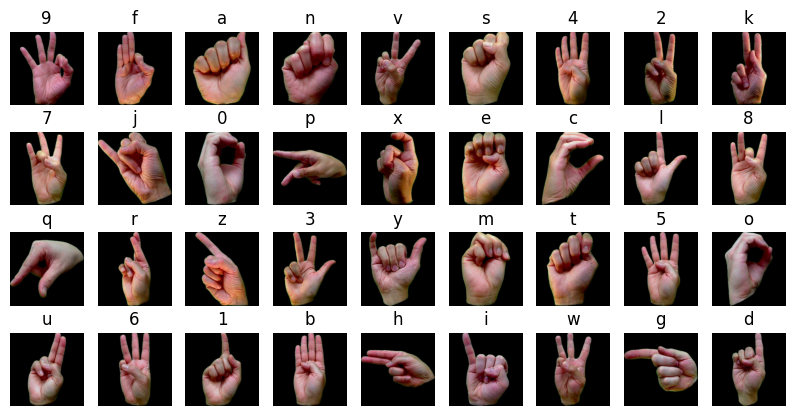

In [4]:
fig, ax = plt.subplots(4, 9, figsize=(10, 5))

img_classes = [os.path.join(path, im) for im in os.listdir(path)]

ax = ax.flatten()

for i, img_class in enumerate(img_classes):
    img = os.listdir(img_class)[np.random.randint(0, 10)]
    img_path = os.path.join(img_class, img)
    image = cv2.imread(img_path)
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i].set_title(os.path.basename(img_class))
    ax[i].axis('off')

plt.show()

In [5]:
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    image_files = glob.glob(os.path.join(folder_path, '*.jpeg'))
    num_images = len(image_files)
    print(folder, 'Number of images in folder:', num_images)

9 Number of images in folder: 70
f Number of images in folder: 70
a Number of images in folder: 70
n Number of images in folder: 70
v Number of images in folder: 70
s Number of images in folder: 70
4 Number of images in folder: 70
2 Number of images in folder: 70
k Number of images in folder: 70
7 Number of images in folder: 70
j Number of images in folder: 70
0 Number of images in folder: 70
p Number of images in folder: 70
x Number of images in folder: 70
e Number of images in folder: 70
c Number of images in folder: 70
l Number of images in folder: 70
8 Number of images in folder: 70
q Number of images in folder: 70
r Number of images in folder: 70
z Number of images in folder: 70
3 Number of images in folder: 70
y Number of images in folder: 70
m Number of images in folder: 70
t Number of images in folder: 65
5 Number of images in folder: 70
o Number of images in folder: 70
u Number of images in folder: 70
6 Number of images in folder: 70
1 Number of images in folder: 70
b Number o

In [6]:

data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    image_size=(64, 64),
    batch_size=32,
    validation_split=0.2,
    seed=123,
    label_mode = 'categorical',
    subset="training")

Found 2515 files belonging to 36 classes.
Using 2012 files for training.


In [7]:
train_size = int(0.8 * len(data))
val_size = int(0.2 * len(data)) + 1
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    image_size=(64, 64),
    batch_size=32,
    validation_split=0.2,
    seed=123,
    label_mode = 'categorical',
    subset="validation")

Found 2515 files belonging to 36 classes.
Using 503 files for validation.


In [8]:
train_data = train_data.cache().prefetch(tf.data.AUTOTUNE)

In [9]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(36, activation = 'softmax')
])

In [10]:
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping( monitor='val_loss',
                                                   patience=3,
                                                   mode='min',
                                                   restore_best_weights=True)

In [17]:

history = cnn_model.fit(train_data, epochs=15,
                    validation_data=val_data,
                    callbacks=[early_stopping])

Epoch 1/15
50/50 [==============================] - 2s 33ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0924 - val_accuracy: 0.9854
Epoch 2/15
50/50 [==============================] - 2s 33ms/step - loss: 0.0139 - accuracy: 0.9937 - val_loss: 0.0801 - val_accuracy: 0.9879
Epoch 3/15
50/50 [==============================] - 2s 32ms/step - loss: 0.0307 - accuracy: 0.9937 - val_loss: 0.1100 - val_accuracy: 0.9806
Epoch 4/15
50/50 [==============================] - 1s 27ms/step - loss: 0.0323 - accuracy: 0.9894 - val_loss: 0.2286 - val_accuracy: 0.9393
Epoch 5/15
50/50 [==============================] - 1s 28ms/step - loss: 0.0403 - accuracy: 0.9912 - val_loss: 0.1360 - val_accuracy: 0.9636


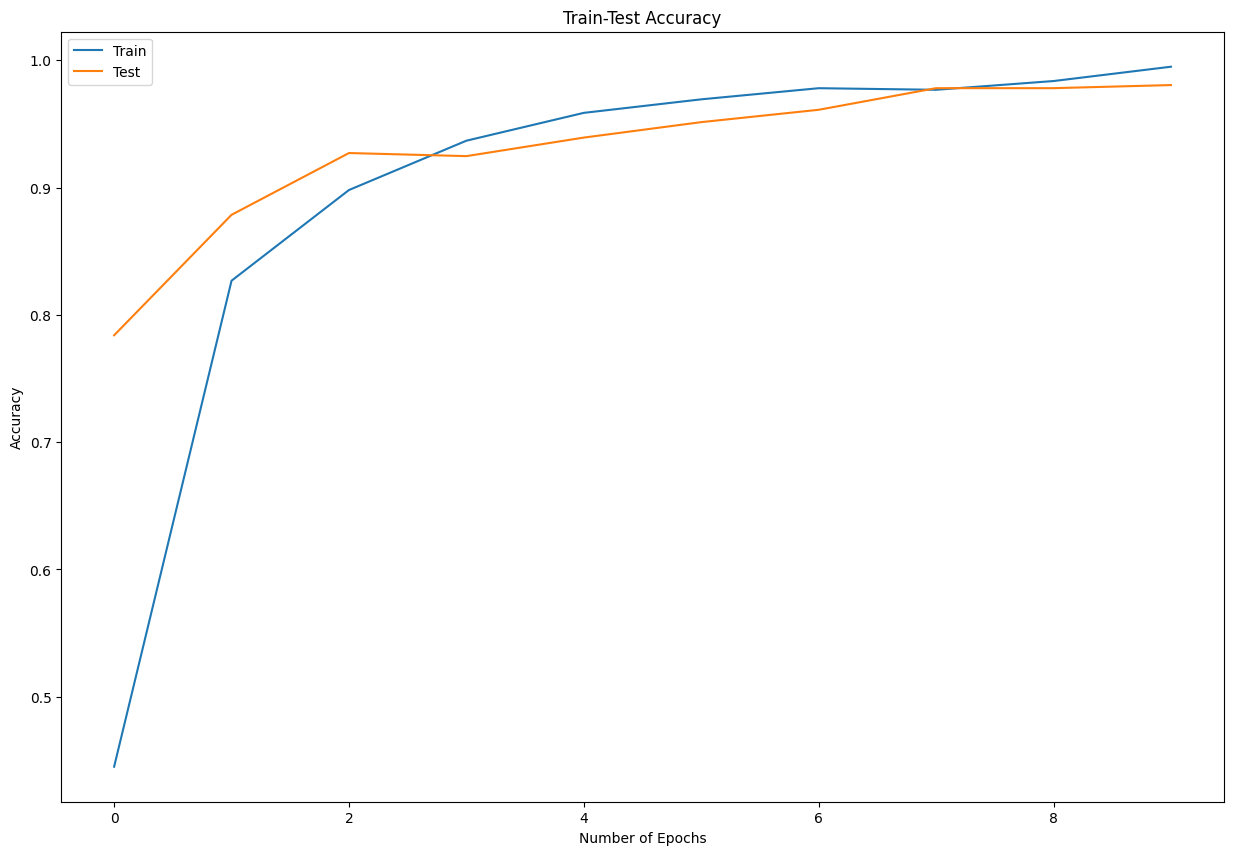

In [12]:
epochs= []
for i in range(10):
    epochs.append(i)

plt.figure(figsize = (15, 10))
plt.plot(epochs,history.history['accuracy'], label="Train")
plt.plot(epochs,history.history['val_accuracy'], label="Test")
plt.title("Train-Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

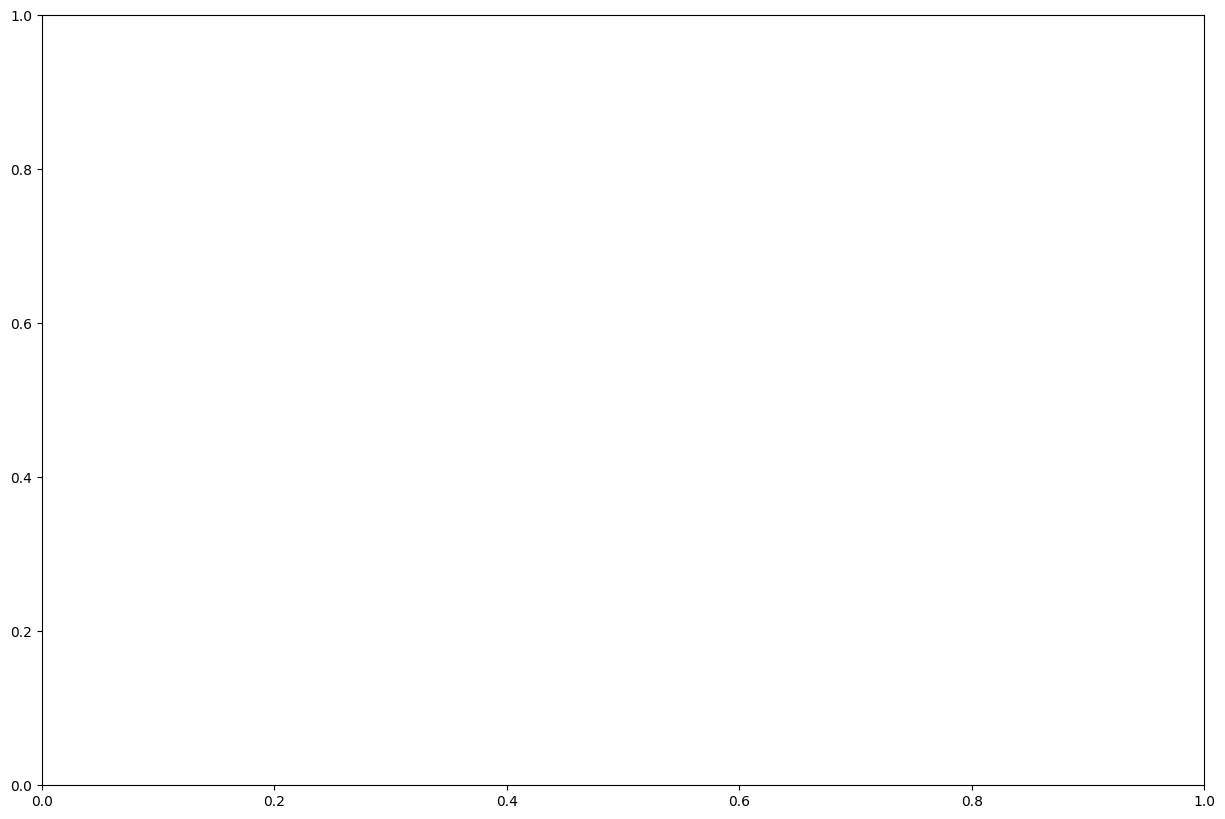

In [18]:
plt.figure(figsize = (15, 10))
plt.plot(epochs,history.history['loss'], label="Train")
plt.plot(epochs,history.history['val_loss'], label="Test")
plt.title("Train-Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [16]:
cnn_model.evaluate(test_data)

16/16 [==============================] - 1s 23ms/step - loss: 0.0582 - accuracy: 0.9821


[0.058151599019765854, 0.9821073412895203]